# SEGUNDO EXÁMEN
## GEOFÍSICA MATEMÁTICA Y COMPUTACIONAL

- Profesor: Luis Miguel de la Cruz
- Alumno: Alan de la Fuente Bonfil

### EJERCICIO 2: DECAIMIENTO RADIOACTIVO

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
""" 
Se define la función para el tamaño de la malla 

Parámetros 

a = punto de inicio del dominio
b = punto final del dominio
Nt = número de nodos o paso del tiempo

return
ht = tamaño del paso del tiempo
"""
def mesh (a, b, Nt ):
    ht = (b-a) / Nt
    return ht
"""
función de la solución exacta

parámetros 
t = tiempo
y0 = condición inicial 
lam = lambda

"""

def exactSolution (t, y0 , lam ):
    return y0 * np. exp (- lam * t)

"""
función para el método de Euler hacia adelante

parámetros

ht = tamaño del paso de tiempo
lam = lambda

return
An = aproximación de Euler hacia adelante

"""
def forwardEuler (y, ht , lam ):
    A = 1 - ht* lam
    An = [A]
    for i, val in enumerate (y [0: -1]):
        y[i +1] = A * y[i]
        An. append (An[i] * A)
    return An

"""
función para el método de Euler hacia atrás

parámetros

ht = tamaño del paso de tiempo
lam = lambda

return
Bn = aproximación de Euler hacia atrás
"""

def backwardEuler (y, ht , lam ):
    B = 1 /(1 + ht*lam)
    Bn = [B]
    for i, val in enumerate (y [0: -1]):
        y[i +1] = B * y[i]
        Bn. append (Bn[i] * B)
    return Bn

In [26]:
Nt = 7
Tmax = 10 #Tiempo máximo
ht = mesh (0, Tmax , Nt) #paso del tiempo
y0 = 20 #condición inicial
lam = 1.5
t = np. linspace (0, Tmax , Nt +1) #Coordenadas de la malla
yf = np. zeros (Nt +1) 
yb = np. zeros (Nt +1)
yf [0] = y0
yb [0] = y0
error_f = forwardEuler (yf , ht , lam ) #cálculo de error para Euler hacia adelante
error_b = backwardEuler (yb , ht , lam ) #Cálculo de error para Euler hacia atrás
tl = np. linspace (0, Tmax , 100) #Coordenadas de la malla para mejor graficación
y_exacta = exactSolution (tl , y0 , lam ) #solución exacta por malla extendida
y_exac_p = exactSolution (t, y0 , lam) #solución exacta por malla normal
norma_error_f = np. linalg . norm (yf - y_exac_p ,2) #aplicación de norma 2 al error
norma_error_b = np. linalg . norm (yb - y_exac_p ,2) #aplicación de norma 2 al error


In [27]:
An = forwardEuler(yf, ht, lam)
Bn = backwardEuler(yb, ht, lam)

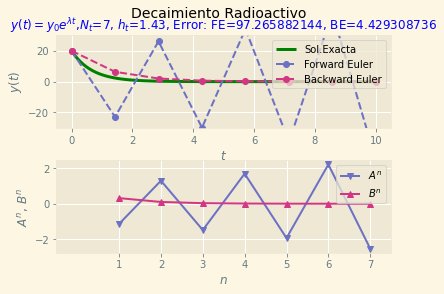

In [28]:
Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '={}'.format(Nt) + ', $h_t$' + '={:03.2f}'.format(ht)
Error = ', Error: FE={:10.9f}, BE={:10.9f}'.format(norma_error_f,norma_error_b)

plt.style.use(['Solarize_Light2'])
fig,(ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)
ax1.plot(tl, y_exacta, 'g-',lw =3,label ='Sol.Exacta')
ax1.plot(t, yf, 'C7o--', label ='Forward Euler')
ax1.plot(t, yb, 'C6o--', label ='Backward Euler')
ax1.set_title(Ecuacion + Error, fontsize =12, color ='blue')
ax1.set_xlim(-0.5,t[-1]+0.5)
ax1.set_ylim(-30 ,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc='upper right', ncol =1, framealpha =0.75 , fancybox =True , fontsize =10)
ax1.grid(color ='w')
nticks = np.arange(1, Nt +1 ,1)
ax2.plot(nticks, An[:-1],'C7v-', label ='$A^n$')
ax2.plot(nticks, Bn[:-1],'C6^-', label ='$B^n$')
ax2.set_xlim(-0.5 ,Nt +0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc='upper right',ncol =1,framealpha =0.75, fancybox =True, fontsize =10)
ax2.grid(color ='w')
plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

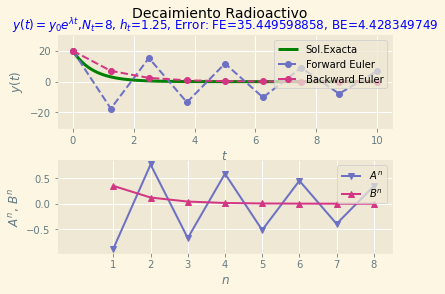

In [29]:
Nt = 8
Tmax = 10 #Tiempo máximo
ht = mesh (0, Tmax , Nt) #paso del tiempo
y0 = 20 #condición inicial
lam = 1.5
t = np. linspace (0, Tmax , Nt +1) #Coordenadas de la malla
yf = np. zeros (Nt +1) 
yb = np. zeros (Nt +1)
yf [0] = y0
yb [0] = y0
error_f = forwardEuler (yf , ht , lam ) #cálculo de error para Euler hacia adelante
error_b = backwardEuler (yb , ht , lam ) #Cálculo de error para Euler hacia atrás
tl = np. linspace (0, Tmax , 100) #Coordenadas de la malla para mejor graficación
y_exacta = exactSolution (tl , y0 , lam ) #solución exacta por malla extendida
y_exac_p = exactSolution (t, y0 , lam) #solución exacta por malla normal
norma_error_f = np. linalg . norm (yf - y_exac_p ,2) #aplicación de norma 2 al error
norma_error_b = np. linalg . norm (yb - y_exac_p ,2) #aplicación de norma 2 al error

An = forwardEuler(yf, ht, lam)
Bn = backwardEuler(yb, ht, lam)

Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '={}'.format(Nt) + ', $h_t$' + '={:03.2f}'.format(ht)
Error = ', Error: FE={:10.9f}, BE={:10.9f}'.format(norma_error_f,norma_error_b)

plt.style.use(['Solarize_Light2'])
fig,(ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)
ax1.plot(tl, y_exacta, 'g-',lw =3,label ='Sol.Exacta')
ax1.plot(t, yf, 'C7o--', label ='Forward Euler')
ax1.plot(t, yb, 'C6o--', label ='Backward Euler')
ax1.set_title(Ecuacion + Error, fontsize =12, color ='blue')
ax1.set_xlim(-0.5,t[-1]+0.5)
ax1.set_ylim(-30 ,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc='upper right', ncol =1, framealpha =0.75 , fancybox =True , fontsize =10)
ax1.grid(color ='w')
nticks = np.arange(1, Nt +1 ,1)
ax2.plot(nticks, An[:-1],'C7v-', label ='$A^n$')
ax2.plot(nticks, Bn[:-1],'C6^-', label ='$B^n$')
ax2.set_xlim(-0.5 ,Nt +0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc='upper right',ncol =1,framealpha =0.75, fancybox =True, fontsize =10)
ax2.grid(color ='w')
plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

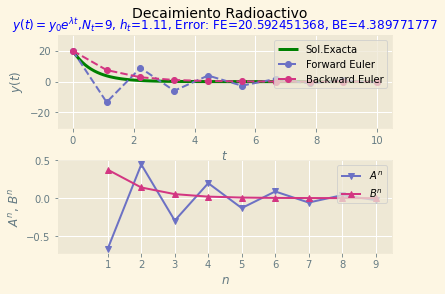

In [30]:
Nt = 9
Tmax = 10 #Tiempo máximo
ht = mesh (0, Tmax , Nt) #paso del tiempo
y0 = 20 #condición inicial
lam = 1.5
t = np. linspace (0, Tmax , Nt +1) #Coordenadas de la malla
yf = np. zeros (Nt +1) 
yb = np. zeros (Nt +1)
yf [0] = y0
yb [0] = y0
error_f = forwardEuler (yf , ht , lam ) #cálculo de error para Euler hacia adelante
error_b = backwardEuler (yb , ht , lam ) #Cálculo de error para Euler hacia atrás
tl = np. linspace (0, Tmax , 100) #Coordenadas de la malla para mejor graficación
y_exacta = exactSolution (tl , y0 , lam ) #solución exacta por malla extendida
y_exac_p = exactSolution (t, y0 , lam) #solución exacta por malla normal
norma_error_f = np. linalg . norm (yf - y_exac_p ,2) #aplicación de norma 2 al error
norma_error_b = np. linalg . norm (yb - y_exac_p ,2) #aplicación de norma 2 al error

An = forwardEuler(yf, ht, lam)
Bn = backwardEuler(yb, ht, lam)

Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '={}'.format(Nt) + ', $h_t$' + '={:03.2f}'.format(ht)
Error = ', Error: FE={:10.9f}, BE={:10.9f}'.format(norma_error_f,norma_error_b)

plt.style.use(['Solarize_Light2'])
fig,(ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)
ax1.plot(tl, y_exacta, 'g-',lw =3,label ='Sol.Exacta')
ax1.plot(t, yf, 'C7o--', label ='Forward Euler')
ax1.plot(t, yb, 'C6o--', label ='Backward Euler')
ax1.set_title(Ecuacion + Error, fontsize =12, color ='blue')
ax1.set_xlim(-0.5,t[-1]+0.5)
ax1.set_ylim(-30 ,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc='upper right', ncol =1, framealpha =0.75 , fancybox =True , fontsize =10)
ax1.grid(color ='w')
nticks = np.arange(1, Nt +1 ,1)
ax2.plot(nticks, An[:-1],'C7v-', label ='$A^n$')
ax2.plot(nticks, Bn[:-1],'C6^-', label ='$B^n$')
ax2.set_xlim(-0.5 ,Nt +0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc='upper right',ncol =1,framealpha =0.75, fancybox =True, fontsize =10)
ax2.grid(color ='w')
plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

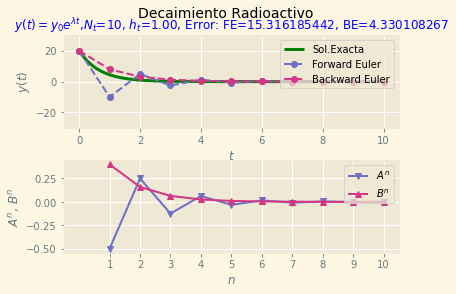

In [31]:
Nt = 10
Tmax = 10 #Tiempo máximo
ht = mesh (0, Tmax , Nt) #paso del tiempo
y0 = 20 #condición inicial
lam = 1.5
t = np. linspace (0, Tmax , Nt +1) #Coordenadas de la malla
yf = np. zeros (Nt +1) 
yb = np. zeros (Nt +1)
yf [0] = y0
yb [0] = y0
error_f = forwardEuler (yf , ht , lam ) #cálculo de error para Euler hacia adelante
error_b = backwardEuler (yb , ht , lam ) #Cálculo de error para Euler hacia atrás
tl = np. linspace (0, Tmax , 100) #Coordenadas de la malla para mejor graficación
y_exacta = exactSolution (tl , y0 , lam ) #solución exacta por malla extendida
y_exac_p = exactSolution (t, y0 , lam) #solución exacta por malla normal
norma_error_f = np. linalg . norm (yf - y_exac_p ,2) #aplicación de norma 2 al error
norma_error_b = np. linalg . norm (yb - y_exac_p ,2) #aplicación de norma 2 al error

An = forwardEuler(yf, ht, lam)
Bn = backwardEuler(yb, ht, lam)

Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '={}'.format(Nt) + ', $h_t$' + '={:03.2f}'.format(ht)
Error = ', Error: FE={:10.9f}, BE={:10.9f}'.format(norma_error_f,norma_error_b)

plt.style.use(['Solarize_Light2'])
fig,(ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)
ax1.plot(tl, y_exacta, 'g-',lw =3,label ='Sol.Exacta')
ax1.plot(t, yf, 'C7o--', label ='Forward Euler')
ax1.plot(t, yb, 'C6o--', label ='Backward Euler')
ax1.set_title(Ecuacion + Error, fontsize =12, color ='blue')
ax1.set_xlim(-0.5,t[-1]+0.5)
ax1.set_ylim(-30 ,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc='upper right', ncol =1, framealpha =0.75 , fancybox =True , fontsize =10)
ax1.grid(color ='w')
nticks = np.arange(1, Nt +1 ,1)
ax2.plot(nticks, An[:-1],'C7v-', label ='$A^n$')
ax2.plot(nticks, Bn[:-1],'C6^-', label ='$B^n$')
ax2.set_xlim(-0.5 ,Nt +0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc='upper right',ncol =1,framealpha =0.75, fancybox =True, fontsize =10)
ax2.grid(color ='w')
plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

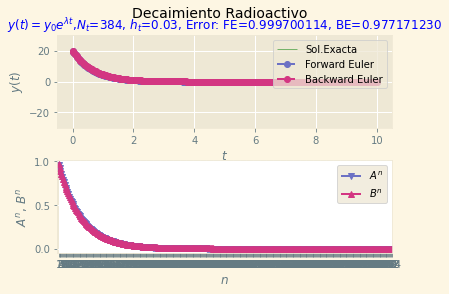

In [32]:
Nt = 384
Tmax = 10 #Tiempo máximo
ht = mesh (0, Tmax , Nt) #paso del tiempo
y0 = 20 #condición inicial
lam = 1.5
t = np. linspace (0, Tmax , Nt +1) #Coordenadas de la malla
yf = np. zeros (Nt +1) 
yb = np. zeros (Nt +1)
yf [0] = y0
yb [0] = y0
error_f = forwardEuler (yf , ht , lam ) #cálculo de error para Euler hacia adelante
error_b = backwardEuler (yb , ht , lam ) #Cálculo de error para Euler hacia atrás
tl = np. linspace (0, Tmax , 100) #Coordenadas de la malla para mejor graficación
y_exacta = exactSolution (tl , y0 , lam ) #solución exacta por malla extendida
y_exac_p = exactSolution (t, y0 , lam) #solución exacta por malla normal
norma_error_f = np. linalg . norm (yf - y_exac_p ,2) #aplicación de norma 2 al error
norma_error_b = np. linalg . norm (yb - y_exac_p ,2) #aplicación de norma 2 al error

An = forwardEuler(yf, ht, lam)
Bn = backwardEuler(yb, ht, lam)

Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '={}'.format(Nt) + ', $h_t$' + '={:03.2f}'.format(ht)
Error = ', Error: FE={:10.9f}, BE={:10.9f}'.format(norma_error_f,norma_error_b)

plt.style.use(['Solarize_Light2'])
fig,(ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)
ax1.plot(tl, y_exacta, 'g-',lw =0.5,label ='Sol.Exacta')
ax1.plot(t, yf, 'C7o--', label ='Forward Euler')
ax1.plot(t, yb, 'C6o--', label ='Backward Euler')
ax1.set_title(Ecuacion + Error, fontsize =12, color ='blue')
ax1.set_xlim(-0.5,t[-1]+0.5)
ax1.set_ylim(-30 ,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc='upper right', ncol =1, framealpha =0.75 , fancybox =True , fontsize =10)
ax1.grid(color ='w')
nticks = np.arange(1, Nt +1 ,1)
ax2.plot(nticks, An[:-1],'C7v-', label ='$A^n$')
ax2.plot(nticks, Bn[:-1],'C6^-', label ='$B^n$')
ax2.set_xlim(-0.5 ,Nt +0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc='upper right',ncol =1,framealpha =0.75, fancybox =True, fontsize =10)
ax2.grid(color ='w')
plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

#### Ahora use lambda = 2 y conteste lo siguiente:

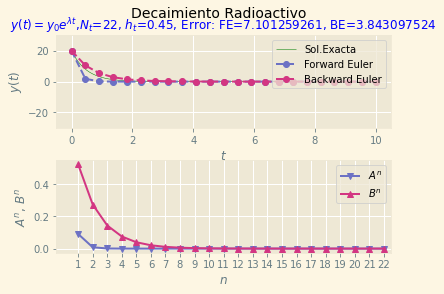

In [72]:
Nt = 22
Tmax = 10 #Tiempo máximo
ht = mesh (0, Tmax , Nt) #paso del tiempo
y0 = 20 #condición inicial
lam = 2
t = np. linspace (0, Tmax , Nt +1) #Coordenadas de la malla
yf = np. zeros (Nt +1) 
yb = np. zeros (Nt +1)
yf [0] = y0
yb [0] = y0
error_f = forwardEuler (yf , ht , lam ) #cálculo de error para Euler hacia adelante
error_b = backwardEuler (yb , ht , lam ) #Cálculo de error para Euler hacia atrás
tl = np. linspace (0, Tmax , 100) #Coordenadas de la malla para mejor graficación
y_exacta = exactSolution (tl , y0 , lam ) #solución exacta por malla extendida
y_exac_p = exactSolution (t, y0 , lam) #solución exacta por malla normal
norma_error_f = np. linalg . norm (yf - y_exac_p ,2) #aplicación de norma 2 al error
norma_error_b = np. linalg . norm (yb - y_exac_p ,2) #aplicación de norma 2 al error

An = forwardEuler(yf, ht, lam)
Bn = backwardEuler(yb, ht, lam)

Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '={}'.format(Nt) + ', $h_t$' + '={:03.2f}'.format(ht)
Error = ', Error: FE={:10.9f}, BE={:10.9f}'.format(norma_error_f,norma_error_b)

plt.style.use(['Solarize_Light2'])
fig,(ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)
ax1.plot(tl, y_exacta, 'g-',lw =0.5,label ='Sol.Exacta')
ax1.plot(t, yf, 'C7o--', label ='Forward Euler')
ax1.plot(t, yb, 'C6o--', label ='Backward Euler')
ax1.set_title(Ecuacion + Error, fontsize =12, color ='blue')
ax1.set_xlim(-0.5,t[-1]+0.5)
ax1.set_ylim(-30 ,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc='upper right', ncol =1, framealpha =0.75 , fancybox =True , fontsize =10)
ax1.grid(color ='w')
nticks = np.arange(1, Nt +1 ,1)
ax2.plot(nticks, An[:-1],'C7v-', label ='$A^n$')
ax2.plot(nticks, Bn[:-1],'C6^-', label ='$B^n$')
ax2.set_xlim(-0.5 ,Nt +0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc='upper right',ncol =1,framealpha =0.75, fancybox =True, fontsize =10)
ax2.grid(color ='w')
plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

1. ¿Para qué valor de Nt el método FE converge?
- El método Forward Euler converge en Nt=100.
2. ¿Para qué valor de Nt el método FE deja de oscilar?
- Deja de oscilar alrededor de Nt=20
3. ¿Para qué valor de Nt el método BE tiene un error menor a 3.0?
- Para un valor de Nt=45.
4. ¿Para qué valor de Nt el método FE tiene un error menor a 3.0?
- Para un valor de Nt=68